In [21]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D
from PIL import Image
import os
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

#### Esercizi svolti da Stefano Polo

#### Matricola: 940175

#### Struttura della cartella
Il seguente *notebook* legge delle immagini dalla cartella <span style="color:red"> Risultati</span>.

### Exercise 12.1

Il seguente esercizio prevede che vengano verificate le *performance* al variare degli ottimizzatori (eccetto il SGR) della DNN (*Deep Neural Network*) presentata nella cella sottostante. I dati di input con cui lavora la rete consistono in immagini da $28\times28$ pixel e il numero di classi di output sono $10$.  Il numero di epoche di apprendimento della DNN è fissato a 5.

In [22]:
#struttura della rete di lavoro
def create_DNN():
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))  #spegnimento del neurone
    model.add(Dense(num_classes, activation='softmax'))

    return model


Ho eseguito il test delle *performance* della rete adottando tutti gli ottimizzatori disponibili in Keras: Adam, RMSprop, Adagrad, Adadelta, Adamax e Nadam. Riporto nelle righe sottostanti i risultati dei test di *loss* e *accuracy* per ciascun otimizzatore.

<img src="Risultati/Adam.png" width="800">
<img src="Risultati/RMSprop.png" width="800">
<img src="Risultati/Adagrad.png" width="800">
<img src="Risultati/Adadelta.png" width="800">
<img src="Risultati/Adamax.png" width="800">
<img src="Risultati/Nadam.png" width="800">

Osservando questi dati di *performance*, si può affermare che:

- Adamax sia l'ottimizzatore migliore con una *loss* di 0.06 e *accuracy* di 0.98;
- RMSprop sia l'ottimizzatore peggiore con una *loss* di 0.15;
- Nadam e Adam presentano un *overfit* dei dati rispettivamente a 2.7 e 3 epoca.

### Exercise 12.1

Il seguente esercizio richiede che venga implementata una CNN (*Convolutional Neural Network*) per riconoscere e distinguere immagini contenenti 10 cifre (da 0 a 9) scritte a mano.

Nella cella sottostante preparo i dati di *training* e di test con i quali lavorerà la CNN che andrò a implementare.

In [102]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


Nella cella sottostante implemento la CNN che andrò ad operare per risolvere questo problema di classificazione. La seguente CNN si struttura in:

- un *layer* di input (la dimensione dell'immagine di input è $28\times28\times1$);
- un *layer* di convoluzione 2D composto da 10 filtri da $5\times5$ (l'output diventa $24\times24\times10$);
- un *layer* di *pooling* con filtri $2\times2$ (adoperano il *max pool*) con 2 *strides* (l'output diventa $12\times12\times10$);
- un *layer* di convoluzione  2D composto da 20 filtri da $5\times5$ (l'output diventa $8\times8\times30$);
- un *layer* di *pooling* con filtri $2\times2$ (adoperano il *max pool*) con 2 *strides* (l'output diventa $4\times4\times30$);
- un *flatten*;
- un *layer* denso da 480 neuroni con tanh come funzione di attivazione;
- un *dropout* da 0.6;
- un *layer* denso di output da 10 neuroni con softmax come funzione di attivazione.

Ho impostato 5 epoche di apprendimento per la CNN appena descritta con SGD come ottimizzatore e la *categorical crossentropy* come *loss function*.

In [103]:
def create_CNN():
    # instantiate model
    model = Sequential() #parto da 28x28*1
    model.add(Conv2D(10, kernel_size=(5, 5),activation='relu',input_shape=input_shape))  #arrivo 24*24*10 
    # il max pooling prende i valori massimi sgranando immagine
    model.add(MaxPooling2D(pool_size=(2,2),strides = 2, padding = 'valid', data_format = None)) #arrivo a 12*12*10  strides = 2 per non sovrapporre componenti di immagini
    model.add(Conv2D(30, kernel_size=(5, 5),activation='relu',input_shape=input_shape)) #arrivo a 8*8*30
    model.add(MaxPooling2D(pool_size=(2,2),strides = 2, padding = 'valid', data_format = None)) #arrivo a 4*4*30
    model.add(Flatten()) #stira le immagini
    model.add(Dense(480, activation='tanh')) 
    model.add(Dropout(0.6))
    model.add(Dense(10, activation='softmax')) #numeri che vanno da 0 a 9
    
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [104]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 40s 663us/step - loss: 0.4766 - acc: 0.8508 - val_loss: 0.1298 - val_acc: 0.9614
Epoch 2/5
60000/60000 [==============================] - 42s 705us/step - loss: 0.1621 - acc: 0.9494 - val_loss: 0.0901 - val_acc: 0.9720
Epoch 3/5
60000/60000 [==============================] - 39s 642us/step - loss: 0.1239 - acc: 0.9611 - val_loss: 0.0778 - val_acc: 0.9752
Epoch 4/5
60000/60000 [==============================] - 41s 687us/step - loss: 0.1039 - acc: 0.9670 - val_loss: 0.0570 - val_acc: 0.9813
Epoch 5/5
10000/10000 [==============================] - 2s 223us/step

Test loss: 0.05303472221554257
Test accuracy: 0.9821


Nella tabella sottostante riporto i risultati dei test di *loss* e *accuracy* della CNN

10000/10000 [==============================] - 2s 238us/step

Test loss: 0.05303472221554257
Test accuracy: 0.9821


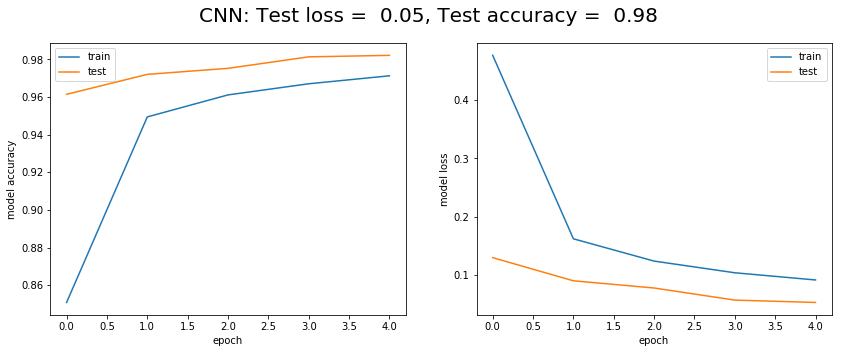

In [105]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
plt.figure(figsize=(14,5))
plt.suptitle('CNN: Test loss =  %.2f, Test accuracy =  %.2f'%(score[0],score[1]),fontsize = 20)
plt.subplot(1,2,1)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.subplot(1,2,2)
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.show()

La CNN implementata precedentemente è ora posta ai dati di test per verificarne l'apprendimento. Dalla cella sottostante si può osservare come la rete sia in grado di predirre le cifre scritte a mano che le vengono proposte.

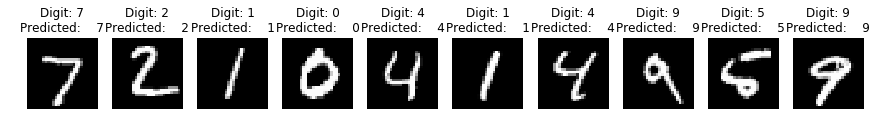

In [106]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Exercise 12.3

Come ulteriore test dell'apprendimento della CNN che ho implementato nell'esercizio precedente, voglio verificare se sia in grado di predirre cifre scritte da me a mano.
Per non rendere eccessivamente lungo il *notebook* presento il codice per la previsione del numero 1 e di seguito delle immagini per i restanti numeri (il lettore può modificare il seguente codice per testare a mano le previsioni della rete con altre cifre contenute nella cartella <span style="color:red">Risultati/Digit</span>).

Image size: 28x28


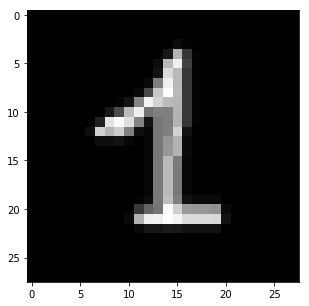

(28, 28)


In [161]:
digit_filename = "Risultati/Digit/One.png"

digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

In [162]:
#faccio un reshape dei dati dell'immagine
data = data.reshape(1,xdim*ydim)
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

(1, 28, 28, 1)
(1, 28, 28, 1)


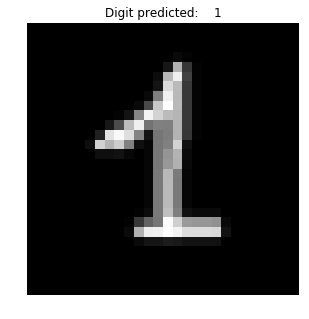

In [163]:
print(data.shape)
#data = data.reshape(1,xdim*ydim)
print(data.shape)
pred_0 = model_CNN.predict(data)
data = data.reshape(xdim,ydim)
plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off')
plt.show()

#### Risultati delle previsioni per le altre cifre

<img src="Risultati/Zero_predicted.png" width="300"> 
<img src="Risultati/Two_predicted.png" width="300">
<img src="Risultati/Three_predicted.png" width="300">
<img src="Risultati/Four_predicted.png" width="300">
<img src="Risultati/Five_predicted.png" width="300">
<img src="Risultati/Six_predicted.png" width="300">
<img src="Risultati/Seven_predicted.png" width="300">
<img src="Risultati/Eight_predicted.png" width="300">
<img src="Risultati/Nine_predicted.png" width="300">

Come si può osservare la CNN creata è in grado di predire le cifre che ho scritto a mano. In più la rete è in grado di calssificare una cifra scritta in un angolo dell'immagine (segno di un buon apprendimento)
<img src="Risultati/Two_corner_predicted.png" width="300">
Tuttavia la CNN creata non è in grado di classificare correttamente una cifra ruotata nell'immagine
<img src="Risultati/Three_rotation_predicted.png" width="300">